## Introduction

This notebook presents a full exploratory data analysis (EDA) on a customer analytics dataset. The steps include loading data, inspecting its structure, handling missing values and duplicates, and producing a series of visualizations to understand demographic and behavioral patterns. Graphs include distributions of age, gender counts, spending scores, income vs spending relationships    device preferences, and a correlation heatmap.  

The following sections walk through each stage of the EDA and culminate with key findings.

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("customer_analytics.csv")

In [7]:
df.head()
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 255 entries, 0 to 254
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   CustomerID            255 non-null    int64  
 1   Age                   255 non-null    int64  
 2   Gender                255 non-null    object 
 3   City                  255 non-null    object 
 4   Education             243 non-null    object 
 5   MaritalStatus         255 non-null    object 
 6   AnnualIncome          243 non-null    float64
 7   SpendingScore         255 non-null    int64  
 8   YearsEmployed         255 non-null    int64  
 9   PurchaseFrequency     255 non-null    int64  
 10  OnlineVisitsPerMonth  255 non-null    int64  
 11  ReturnedItems         255 non-null    int64  
 12  PreferredDevice       255 non-null    object 
 13  LastPurchaseAmount    255 non-null    int64  
dtypes: float64(1), int64(8), object(5)
memory usage: 28.0+ KB


,CustomerID,Age,AnnualIncome,SpendingScore,YearsEmployed,PurchaseFrequency,OnlineVisitsPerMonth,ReturnedItems,LastPurchaseAmount
count,255.000000,255.000000,243.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.00000
mean,1126.941176,37.729412,74499.901235,45.721569,14.682353,11.568627,16.078431,1.858824,2795.07451
std,72.397256,9.767842,43939.855655,17.869522,9.651664,7.077899,7.909536,1.409917,1328.77241
min,1001.000000,21.000000,16062.000000,5.000000,1.000000,1.000000,3.000000,0.000000,566.00000
25%,1064.500000,29.000000,56353.000000,34.500000,6.000000,5.000000,10.000000,1.000000,1542.50000
50%,1128.000000,38.000000,69629.000000,47.000000,15.000000,11.000000,16.000000,2.000000,2705.00000
75%,1190.500000,46.000000,84030.500000,57.500000,23.000000,18.000000,23.000000,3.000000,4001.00000
max,1250.000000,54.000000,474327.000000,95.000000,34.000000,24.000000,29.000000,4.000000,4996.00000


In [8]:
df.isnull().sum()

CustomerID               0
Age                      0
Gender                   0
City                     0
Education               12
MaritalStatus            0
AnnualIncome            12
SpendingScore            0
YearsEmployed            0
PurchaseFrequency        0
OnlineVisitsPerMonth     0
ReturnedItems            0
PreferredDevice          0
LastPurchaseAmount       0
dtype: int64

In [9]:
df['Education'] = df['Education'].fillna(df['Education'].mode()[0])

df['AnnualIncome'] = df['AnnualIncome'].fillna(df['AnnualIncome'].median())

In [10]:
before_rows = df.shape[0]
df = df.drop_duplicates()
after_rows = df.shape[0]

print("Duplicates removed:", before_rows - after_rows)

Duplicates removed: 5


In [11]:
df.isnull().sum()

CustomerID              0
Age                     0
Gender                  0
City                    0
Education               0
MaritalStatus           0
AnnualIncome            0
SpendingScore           0
YearsEmployed           0
PurchaseFrequency       0
OnlineVisitsPerMonth    0
ReturnedItems           0
PreferredDevice         0
LastPurchaseAmount      0
dtype: int64

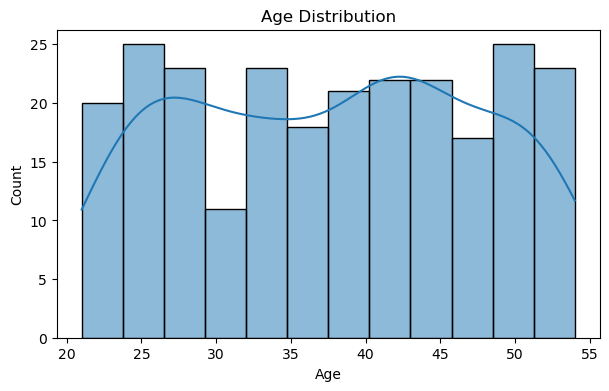

In [12]:
plt.figure(figsize=(7,4))
sns.histplot(df['Age'], bins=12, kde=True)
plt.title("Age Distribution")
plt.show()

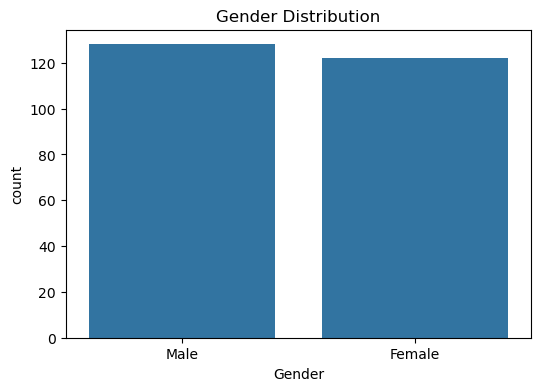

In [13]:
plt.figure(figsize=(6,4))
sns.countplot(x='Gender', data=df)
plt.title("Gender Distribution")
plt.show()

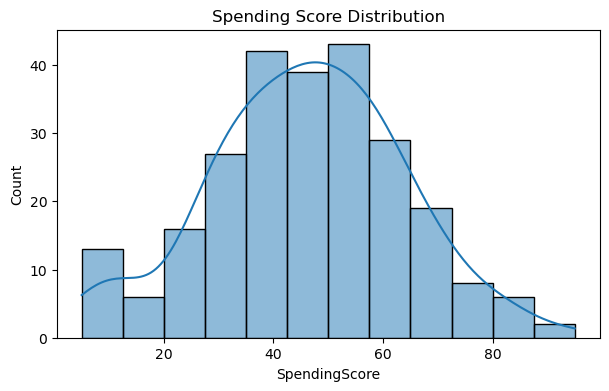

In [14]:
plt.figure(figsize=(7,4))
sns.histplot(df['SpendingScore'], bins=12, kde=True)
plt.title("Spending Score Distribution")
plt.show()

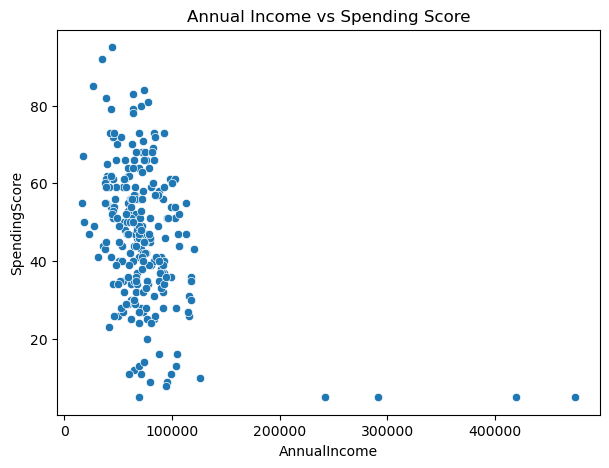

In [15]:
plt.figure(figsize=(7,5))
sns.scatterplot(x='AnnualIncome', y='SpendingScore', data=df)
plt.title("Annual Income vs Spending Score")
plt.show()

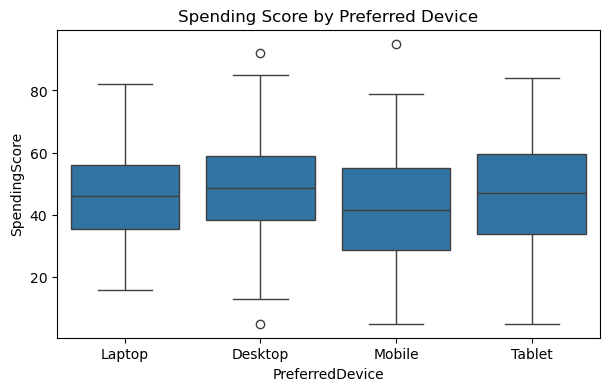

In [16]:
plt.figure(figsize=(7,4))
sns.boxplot(x='PreferredDevice', y='SpendingScore', data=df)
plt.title("Spending Score by Preferred Device")
plt.show()

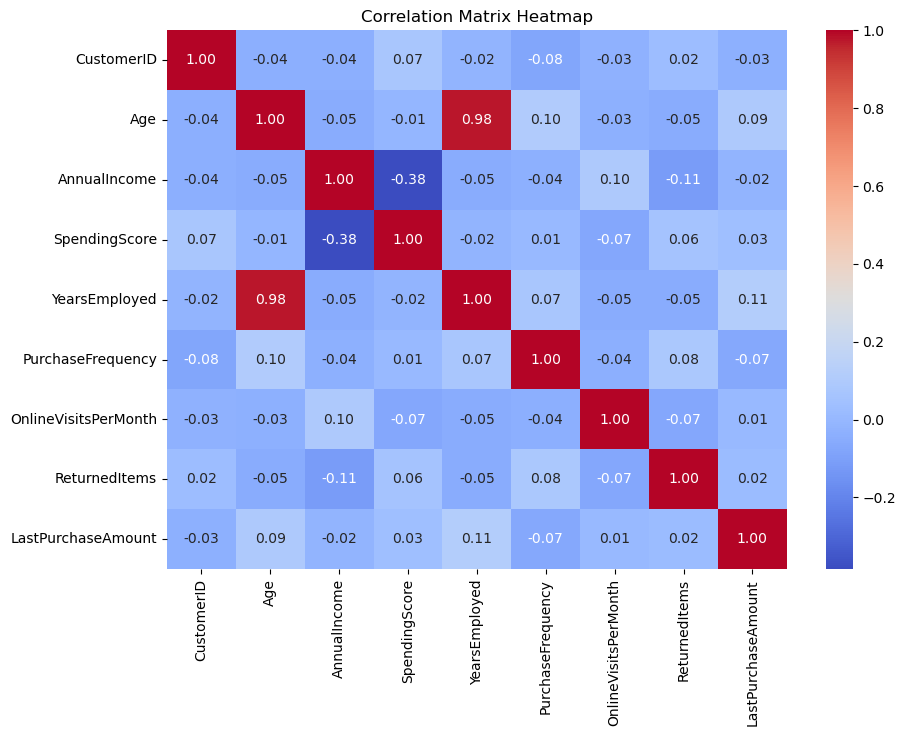

In [17]:
numeric_df = df.select_dtypes(include=[np.number])

plt.figure(figsize=(10,7))
corr = numeric_df.corr()

sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix Heatmap")
plt.show()

## Conclusion

The exploratory analysis provided useful insights into the customer base:

- **Demographics:** Age is broadly distributed with a slight concentration in the mid-20s to mid-40s; gender split is approximately even.
- **Spending patterns:** Spending scores cluster around the middle range, with a few outliers on both low and high ends. Income does not strongly predict spending score based on the scatter plot.
- **Device preference:** No single preferred device dominates spending behaviour, though desktops and tablets show slightly higher median scores.
- **Correlations:** Most numeric features exhibit weak correlations; annual income has a mild inverse correlation with spending score, suggesting higher earners spend less relative to their income in this dataset.

These findings can guide targeted marketing strategies and further modelling. Future work might include segmentation (clustering) or predictive models using this cleaned data.


In [ ]:
# Generate PDF report with text and plots

from fpdf import FPDF

# define text from introduction and conclusion
intro_text = (
    "This notebook presents a full exploratory data analysis (EDA) on a customer analytics dataset. "
    "The steps include loading data, inspecting its structure, handling missing values and duplicates, "
    "and producing a series of visualizations to understand demographic and behavioral patterns. "
    "Graphs include distributions of age, gender counts, spending scores, income vs spending relationships, "
    "device preferences, and a correlation heatmap."
)
conclusion_text = (
    "The exploratory analysis provided useful insights into the customer base:\n"
    "- Demographics: Age is broadly distributed with a slight concentration in the mid-20s to mid-40s; gender split is approximately even.\n"
    "- Spending patterns: Spending scores cluster around the middle range, with a few outliers on both low and high ends. Income does not strongly predict spending score based on the scatter plot.\n"
    "- Device preference: No single preferred device dominates spending behaviour, though desktops and tablets show slightly higher median scores.\n"
    "- Correlations: Most numeric features exhibit weak correlations; annual income has a mild inverse correlation with spending score, suggesting higher earners spend less relative to their income in this dataset.\n\n"
    "These findings can guide targeted marketing strategies and further modelling. Future work might include segmentation (clustering) or predictive models using this cleaned data."
)

# save each existing figure by re-running the plotting code with savefig
graph_files = []

plt.figure(figsize=(7,4))
sns.histplot(df['Age'], bins=12, kde=True)
plt.title("Age Distribution")
plt.savefig("age_distribution.png")
graph_files.append("age_distribution.png")
plt.close()

plt.figure(figsize=(6,4))
sns.countplot(x='Gender', data=df)
plt.title("Gender Distribution")
plt.savefig("gender_distribution.png")
graph_files.append("gender_distribution.png")
plt.close()

plt.figure(figsize=(7,4))
sns.histplot(df['SpendingScore'], bins=12, kde=True)
plt.title("Spending Score Distribution")
plt.savefig("spending_score_distribution.png")
graph_files.append("spending_score_distribution.png")
plt.close()

plt.figure(figsize=(7,5))
sns.scatterplot(x='AnnualIncome', y='SpendingScore', data=df)
plt.title("Annual Income vs Spending Score")
plt.savefig("income_vs_spending.png")
graph_files.append("income_vs_spending.png")
plt.close()

plt.figure(figsize=(7,4))
sns.boxplot(x='PreferredDevice', y='SpendingScore', data=df)
plt.title("Spending Score by Preferred Device")
plt.savefig("device_spending.png")
graph_files.append("device_spending.png")
plt.close()

plt.figure(figsize=(10,7))
corr = numeric_df.corr()
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix Heatmap")
plt.savefig("correlation_heatmap.png")
graph_files.append("correlation_heatmap.png")
plt.close()

# create pdf
pdf = FPDF()
pdf.set_auto_page_break(auto=True, margin=15)
pdf.add_page()
pdf.set_font("Arial", "B", 16)
pdf.cell(0, 10, "Customer Analytics EDA", ln=1, align="C")
pdf.ln(5)
pdf.set_font("Arial", "", 12)
pdf.multi_cell(0, 8, intro_text)

for img in graph_files:
    pdf.add_page()
    pdf.image(img, w=180)

pdf.add_page()
pdf.set_font("Arial", "", 12)
pdf.multi_cell(0, 8, conclusion_text)

output_path = "EDA_report.pdf"
pdf.output(output_path)
print(f"PDF generated: {output_path}")


TypeError: FPDF.multi_cell() got multiple values for argument 'h'